In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
DATA_PATH = r'C:\Users\pacak\PycharmProjects\sreality_anomaly_detector\data\2023-01-07_scrape.csv'
TARGET_COL = 'price'
from sklearn.metrics import r2_score
import seaborn as sns
data = pd.read_csv(DATA_PATH)

In [17]:
data.head(20)

,id,building,condition,ownership,floor,area,energy_type,elevator,parking,barrierless,price,equipped,closest_transport_distance,closest_shop_distance,metro_distance,train_distance,restaurant_distance,distance_to_centre,balcony,cellar
0,56968780,Panelová,Po rekonstrukci,Osobní,6,37,D,True,NaN,NaN,4376000,NaN,58.0,142.0,410.0,895,145,5.114634,NaN,True
1,4065768524,Cihlová,Po rekonstrukci,Osobní,4,29,D,True,NaN,NaN,5299000,True,139.0,209.0,268.0,1882,81,1.038753,True,NaN
2,2895128396,Cihlová,Velmi dobrý,Osobní,2,23,G,NaN,NaN,NaN,4051000,False,30.0,111.0,1489.0,2018,121,2.942182,NaN,NaN
3,3812763468,Cihlová,Dobrý,Osobní,1,36,G,True,NaN,False,3121000,Částečně,134.0,334.0,1451.0,2841,235,7.127061,NaN,True
4,3307112012,Smíšená,Ve výstavbě,Osobní,6,33,B,NaN,True,NaN,5374000,NaN,73.0,120.0,3151.0,1051,322,10.812680,True,True
5,552929100,Panelová,Velmi dobrý,Osobní,7,29,G,True,True,True,2988000,False,202.0,182.0,1990.0,1331,498,7.889420,NaN,True
6,4226344012,Cihlová,Novostavba,Osobní,1,39,C,NaN,True,True,5950000,True,108.0,97.0,1037.0,4330,160,8.544879,NaN,NaN
7,3824915532,Skeletová,Ve výstavbě,Osobní,4,40,G,True,True,NaN,4582000,NaN,98.0,467.0,5684.0,4131,956,8.186857,True,NaN
8,1342694988,Skeletová,Velmi dobrý,Osobní,2,37,C,True,1,NaN,4848000,NaN,157.0,0.0,281.0,1878,0,6.828020,True,True
9,561374284,Cihlová,Novostavba,Osobní,8,38,B,True,1,NaN,4847000,NaN,40.0,83.0,67.0,360,14,6.200092,NaN,True


# Price distribution

Average price is 8149393.853296193
Median price is 7889000.0


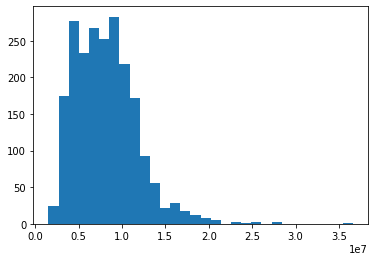

In [18]:
plt.hist(data[TARGET_COL], bins = 30 )
print(f'Average price is {np.mean(data[TARGET_COL])}')
print(f'Median price is {np.median(data[TARGET_COL])}')

In [19]:
def print_median_prices(col):
    dist_values = data[col].unique().tolist()
    for val in dist_values:
        print(val)
        print(f'Median price for type {val} is {np.median(data[data[col]==val][TARGET_COL])}')

# Categorical_cols

### Building

Panelová
Median price for type Panelová is 6122000.0
Cihlová
Median price for type Cihlová is 8163000.0
Smíšená
Median price for type Smíšená is 9515000.0
Skeletová
Median price for type Skeletová is 9006500.0
Kamenná
Median price for type Kamenná is 12782000.0


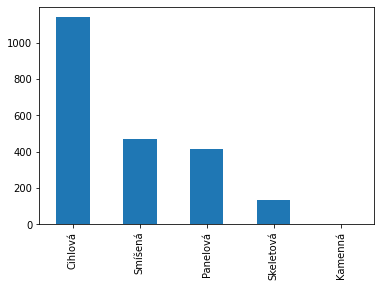

In [20]:
data['building'].value_counts(dropna = False).plot(kind = 'bar')
print_median_prices('building')

### Condition

Po rekonstrukci
Median price for type Po rekonstrukci is 7469000.0
Velmi dobrý
Median price for type Velmi dobrý is 7483000.0
Dobrý
Median price for type Dobrý is 6380000.0
Ve výstavbě
Median price for type Ve výstavbě is 9700000.0
Novostavba
Median price for type Novostavba is 8979000.0
Před rekonstrukcí
Median price for type Před rekonstrukcí is 6530000.0
Projekt
Median price for type Projekt is 10869000.0
V rekonstrukci
Median price for type V rekonstrukci is 10298000.0
Špatný
Median price for type Špatný is 7755000.0


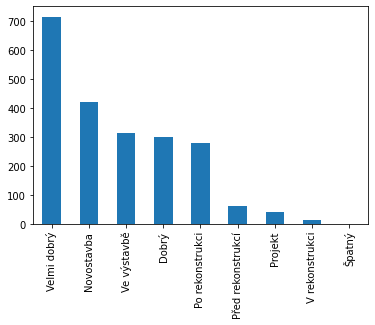

In [21]:
data['condition'].value_counts(dropna = False).plot(kind = 'bar')
print_median_prices('condition')

### ownership

Osobní
Median price for type Osobní is 8108000.0
Družstevní
Median price for type Družstevní is 6122000.0
Státní/obecní
Median price for type Státní/obecní is 8299000.0


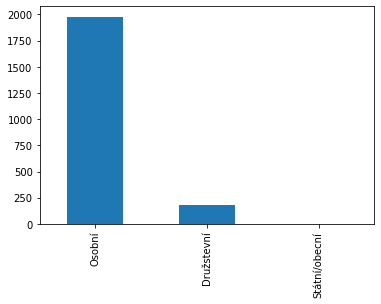

In [22]:
data['ownership'].value_counts(dropna = False).plot(kind = 'bar')
print_median_prices('ownership')

## Floor

6
Median price for type 6 is 7891000.0
4
Median price for type 4 is 8129000.0
2
Median price for type 2 is 8027000.0
1
Median price for type 1 is 7741000.0
7
Median price for type 7 is 7551000.0
8
Median price for type 8 is 6589500.0
-
Median price for type - is 6950000.0
5
Median price for type 5 is 7926000.0
3
Median price for type 3 is 8161000.0
p
Median price for type p is 6684000.0
9
Median price for type 9 is 6789000.0


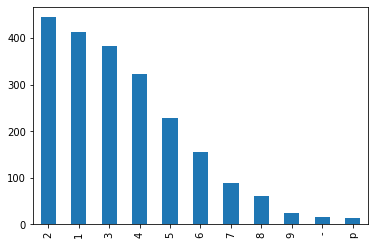

In [23]:
data['floor'].value_counts(dropna = False).plot(kind = 'bar')
print_median_prices('floor')

## energy_type

D
Median price for type D is 6435000.0
G
Median price for type G is 7346000.0
B
Median price for type B is 9589000.0
C
Median price for type C is 7144000.0
nan
Median price for type nan is nan
E
Median price for type E is 7687000.0
F
Median price for type F is 8625500.0
A
Median price for type A is 8161000.0


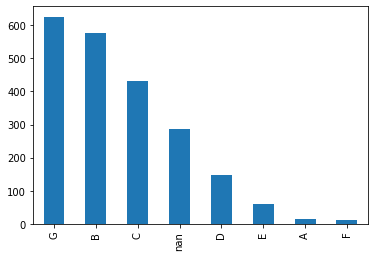

In [25]:
data['energy_type'].value_counts(dropna = False).plot(kind = 'bar')
print_median_prices('energy_type')

### equipped

nan
Median price for type nan is nan
True
Median price for type True is 8027000.0
False
Median price for type False is 7823000.0
Částečně
Median price for type Částečně is 7103000.0


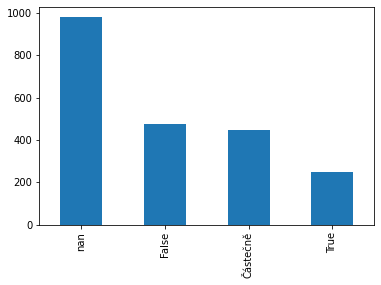

In [26]:
data['equipped'].value_counts(dropna = False).plot(kind = 'bar')
print_median_prices('equipped')

## elevator

True
Median price for type True is 7893000.0
nan
Median price for type nan is nan
False
Median price for type False is 7605000.0


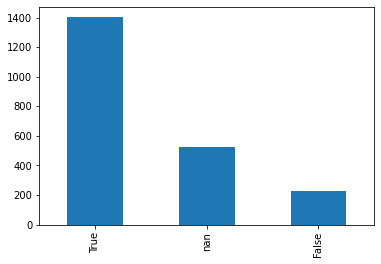

In [27]:
data['elevator'].value_counts(dropna = False).plot(kind = 'bar')
print_median_prices('elevator')

## parking

nan
Median price for type nan is nan
True
Median price for type True is 8557000.0
1
Median price for type 1 is 9544500.0
12
Median price for type 12 is 6662500.0
20
Median price for type 20 is 6371500.0
2
Median price for type 2 is 5789000.0
50
Median price for type 50 is 9932000.0
16
Median price for type 16 is 15991500.0
30
Median price for type 30 is 12517000.0
10
Median price for type 10 is 9522000.0
40
Median price for type 40 is 5972000.0
13
Median price for type 13 is 9149000.0


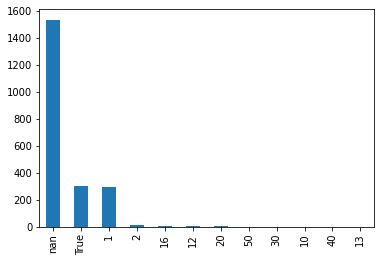

In [28]:
data['parking'].value_counts(dropna = False).plot(kind = 'bar')
print_median_prices('parking')

## Area

correlation:
0.708171344106709


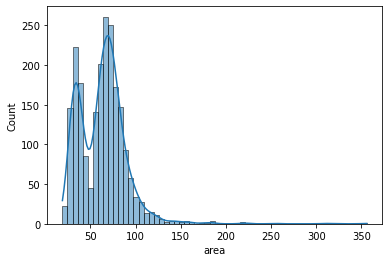

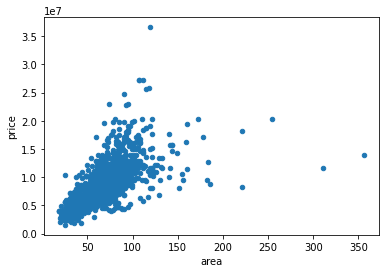

In [29]:
col = 'area'

sns.histplot(x = data[col], kde = True, label=col)
data.plot.scatter(x = col, y = TARGET_COL)
#plt.close()
print('correlation:')
subset = data[data[col].notnull()].copy()
print(subset[[TARGET_COL, col]].corr().iloc[0,1])

## closest_transport_distance

correlation:
-0.05486898954653565


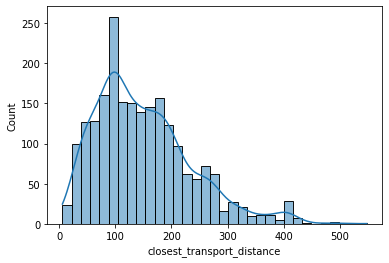

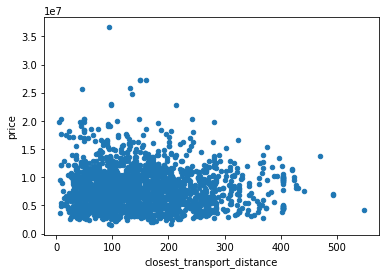

In [30]:
col = 'closest_transport_distance'

sns.histplot(x = data[col], kde = True, label=col)
data.plot.scatter(x = col, y = TARGET_COL)
#plt.close()
print('correlation:')
subset = data[data[col].notnull()].copy()
print(subset[[TARGET_COL, col]].corr().iloc[0,1])

## metro_distance

correlation:
-0.10149021003941383


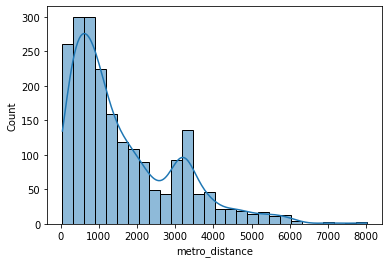

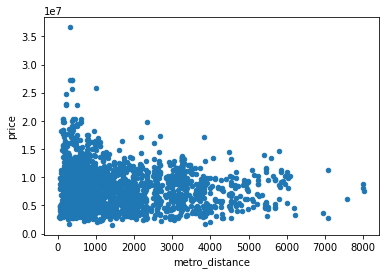

In [31]:
col = 'metro_distance'

sns.histplot(x = data[col], kde = True, label=col)
data.plot.scatter(x = col, y = TARGET_COL)
#plt.close()
print('correlation:')
subset = data[data[col].notnull()].copy()
print(subset[[TARGET_COL, col]].corr().iloc[0,1])

## closest_shop_distance

correlation:
0.04004515281723105


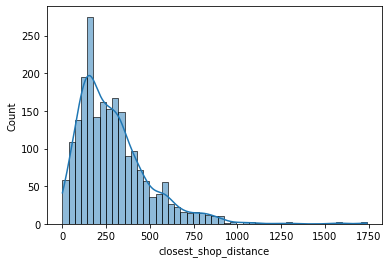

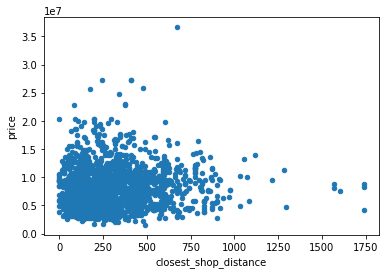

In [32]:
col = 'closest_shop_distance'

sns.histplot(x = data[col], kde = True, label=col)
data.plot.scatter(x = col, y = TARGET_COL)
#plt.close()
print('correlation:')
subset = data[data[col].notnull()].copy()
print(subset[[TARGET_COL, col]].corr().iloc[0,1])

## restaurant_distance

correlation:
-0.03589526962803152


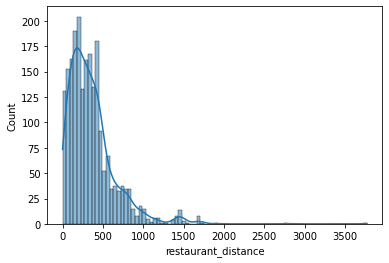

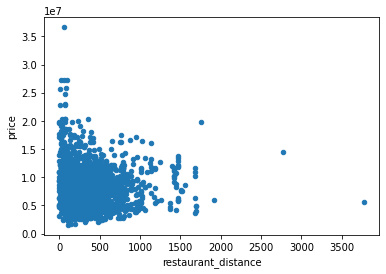

In [33]:
col = 'restaurant_distance'

sns.histplot(x = data[col], kde = True, label=col)
data.plot.scatter(x = col, y = TARGET_COL)
#plt.close()
print('correlation:')
subset = data[data[col].notnull()].copy()
print(subset[[TARGET_COL, col]].corr().iloc[0,1])

## distance_to_centre

correlation:
-0.1792233404054055


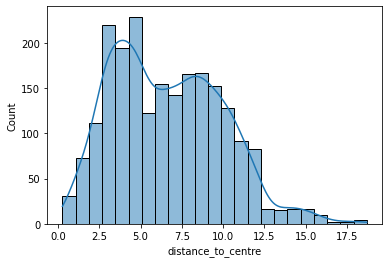

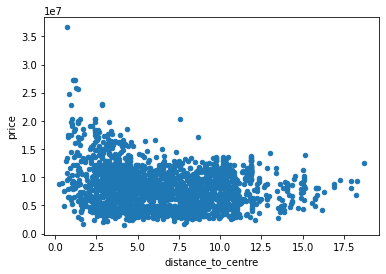

In [34]:
col = 'distance_to_centre'

sns.histplot(x = data[col], kde = True, label=col)
data.plot.scatter(x = col, y = TARGET_COL)
#plt.close()
print('correlation:')
subset = data[data[col].notnull()].copy()
print(subset[[TARGET_COL, col]].corr().iloc[0,1])

In [ ]:
import os
os.chdir('C:\\Users\\pacak\\PycharmProjects\\sreality_anomaly_detector')
from sreality_anomaly_detector.lgbm_trainer import LGBMModelTrainer
DATA_PATH = r'C:\Users\pacak\PycharmProjects\sreality_anomaly_detector\data\2023-01-07_scrape.csv'

In [38]:
local_training_config = {
    "input_path": DATA_PATH,
    "path_to_save": r"C:\Users\pacak\PycharmProjects\sreality_anomaly_detector\models",
}

In [39]:
model = LGBMModelTrainer(local_training_config)

In [40]:
model.load_data()
model.preprocess_data()
#model.ohe_fit()
#model.ohe_predict(os.path.join(model.config["path_to_save"], "ohe_model.pickle"))

In [ ]:
n_trees = model.train_model_CV()

In [ ]:
model.params["num_boost_round"] = n_trees
final_model = model.final_model(model.data[model.preds], model.data[model.target])

In [43]:
predictions = final_model.predict(model.data[model.preds])

In [44]:
r2_score(model.data[model.target], predictions)

0.8703395412456082

2024-01-02 17:53:13,022 : INFO : Variable importance of the features in the model:
2024-01-02 17:53:13,024 : INFO :                        Feature  Importance_gain
0                     elevator     3.938016e+15
1                  barrierless     3.698946e+15
2   closest_transport_distance     1.893900e+16
3        closest_shop_distance     4.252263e+16
4               metro_distance     6.661344e+16
5               train_distance     2.379119e+16
6          restaurant_distance     6.567329e+16
7           distance_to_centre     2.071051e+17
8                      balcony     2.614669e+15
9                       cellar     1.693160e+15
10                    building     9.991984e+16
11                   condition     6.257916e+16
12                     parking     2.402856e+16
13                   ownership     8.753986e+15
14                       floor     3.285176e+15
15                 energy_type     1.755107e+16
16                    equipped     3.505170e+15


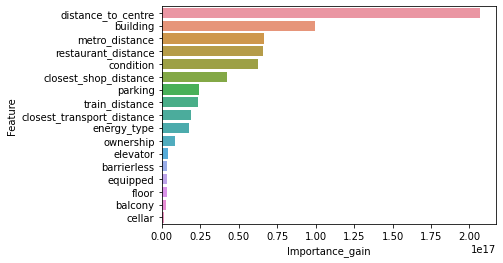

In [28]:
model.compute_var_imp(final_model)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


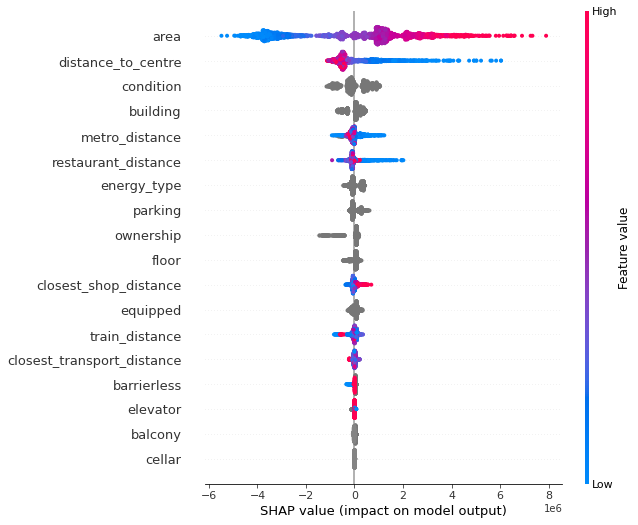

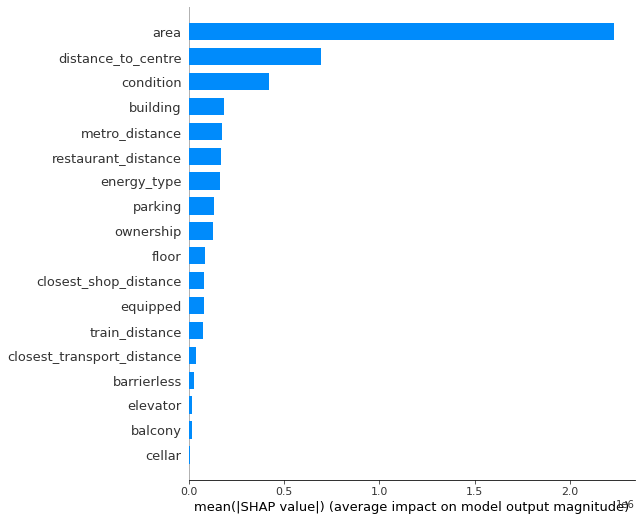

In [46]:
shap_values, explainer = model.print_shap_values(final_model, ret = True)